In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
Current = ["Cash & Cash_Equivalents","Accounts_Receivable","Current_Liabilities", "Current_Asset"]
Long = ["Property, Plant_and_Equipment", "Intangible asset", "投資その他の資産", "Long-term_Liabilities"]

In [3]:
import csv

row1 = ["Cash & Cash_Equivalents", "Accounts_Receivable", "Current_Asset", "Property, Plant_and_Equipment", "無形固定資産", "投資その他の資産"]
row2 = ["2,993,041", "487,230", "111,299", "51,782", "7,005", "400,091"]

row3 = ["Current_Liabilities", "Long-term_liabilities", "Retained_earnings", "Total_Equity", "AOCI", "-"]
row4 = ["702,619", "2,200", "2,236,897", "1,101,094", "7,638", "0"]

with open('BalanceSeat.csv', 'w') as f:
    w = csv.writer(f, lineterminator='\n')
    for i in range(6):
        w.writerow([row1[i], row2[i], row3[i], row4[i]])

In [4]:
df = pd.read_csv('BalanceSeat.csv', 
                 names=('ass', 'ass_value', 'lia', 'lia_value'))

In [5]:
length = 0
for value in df.ass_value:
    length += int(value.replace(",", ""))

In [6]:
print(length)

4050448


In [7]:
def graph(x, data, data_name, color1, color2):
    cum = 0
    for i in range(0, len(data))[::-1]:
        if data_name[i] in Current:
            color = color1
        elif data_name[i] in Long:
            color = color2
        else :
            color = "#ffff7f"
        y = int(data[i].replace(",", ""))
        
        ax.bar(x, y, width=1.0, bottom=cum, color="{}".format(color), edgecolor="black")
        if y > length / 20:
            ax.text(x, cum+0.4*y, "{0}({1})".format(data_name[i], data[i]), 
                    ha='center', va='bottom', fontdict={'family': 'IPAexGothic'})
        cum += y

findfont: Font family ['IPAexGothic'] not found. Falling back to DejaVu Sans.
C:\Users\inmyh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 25237 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inmyh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 36039 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inmyh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12381 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inmyh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inmyh\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 20182 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\inmyh\anaconda3\lib\site-packages\matp

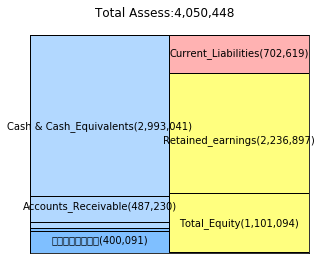

In [8]:
fig, ax = plt.subplots(figsize=(5, 4))
fig.suptitle("Total Assess:{:,}".format(length))
ax.set_xlim(-1, 1)
ax.set_ylim(0, length)
ax.tick_params(labelbottom=False, labelleft=False, left=False, bottom=False)

graph(-0.5, df.ass_value, df.ass, "#b2d8ff", "#7fbfff")
graph(0.5, df.lia_value, df.lia, "#ffb2b2", "#ff7f7f")

plt.show()